In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import inf
import seaborn as seab
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Part II: Analysis of the increasing confirmed cases across each state in the US.


In the first part of our project, my team member has shown the density of the people who confirmed
in each state. In the second part, we are focusing on analyzing the increasing rate of the confirmed
cases across each state. Especially, I will compare the increasing rate changes before and after “lock
down”. As the most report has shown that the time period of lockdown is between March to May,
therefore, we will be using the different plots to show the result of the data.

## Data Collection

The data we are using can be find from CDC website. To acess the date please visit
https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days

### Note: The data we are using are from January to November. For more information please visit the CDC website above

In [7]:
# Read Data of national history
data = pd.read_csv("national-history.csv")
national=pd.DataFrame(data)
# Drop table we do not need
national.drop(['inIcuCumulative','inIcuCurrently','hospitalizedIncrease','hospitalizedCurrently',\
               'hospitalizedCumulative','onVentilatorCumulative','onVentilatorCurrently'],axis=1,inplace=True)
#Drop data from Novenber since the date is not complete
national.drop(national.head(1).index,inplace=True)
national.head()

date     death  deathIncrease   negative  negativeIncrease  positive  \
1  2020-10-31  222319.0            963  120100805           1039157   9078223   
2  2020-10-30  221356.0            933  119061648            980084   8987631   
3  2020-10-29  220423.0           1049  118081564           1008042   8890551   
4  2020-10-28  219374.0           1025  117073522            797077   8802099   
5  2020-10-27  218349.0            931  116276445            818919   8723438   

   positiveIncrease  recovered  states  totalTestResults  \
1             90592  3612517.0      56         146168145   
2             97080  3578452.0      56         144794227   
3             88452  3554336.0      56         143431851   
4             78661  3518140.0      56         142106747   
5             73096  3487666.0      56         141021100   

   totalTestResultsIncrease  
1                   1373918  
2                   1362376  
3                   1325104  
4                   1085647  
5                   1080760

### reload all state data and drop table we do not need to later anylisis

In [8]:
# Read Data of all states history
data1 = pd.read_csv("all-states-history.csv")
state=pd.DataFrame(data1)
# Drop the columns we do not need
state.drop(['dataQualityGrade','deathProbable','hospitalized','hospitalizedCumulative','hospitalizedCurrently',\
            'hospitalizedIncrease','inIcuCumulative','inIcuCurrently','negativeTestsAntibody',\
            'negativeTestsPeopleAntibody','negativeTestsViral','onVentilatorCumulative','onVentilatorCurrently',\
            'positiveCasesViral','positiveScore','positiveTestsAntibody','positiveTestsAntigen',\
            'positiveTestsPeopleAntibody','positiveTestsPeopleAntigen','positiveTestsViral','totalTestEncountersViral',\
            'totalTestEncountersViralIncrease','totalTestsAntibody','totalTestsAntigen','totalTestsPeopleAntibody',\
            'totalTestsPeopleAntigen','totalTestsPeopleViral','totalTestsPeopleViralIncrease'],axis=1,inplace=True)
state.head()

date state   death  deathConfirmed  deathIncrease   negative  \
0  2020-11-01    AK    83.0            83.0              1   587852.0   
1  2020-11-01    AL  2973.0          2767.0              6  1187341.0   
2  2020-11-01    AR  1925.0          1758.0              0  1243490.0   
3  2020-11-01    AS     0.0             NaN              0     1616.0   
4  2020-11-01    AZ  5981.0          5663.0              2  1544171.0   

   negativeIncrease  positive  positiveIncrease  recovered  totalTestResults  \
0                 0   16705.0               350     7104.0          604207.0   
1              5383  193985.0              1700    81005.0         1352580.0   
2                 0  112190.0                 0   100067.0         1346972.0   
3                 0       0.0                 0        NaN            1616.0   
4             12748  247473.0              1527    41398.0         1785767.0   

   totalTestResultsIncrease  totalTestsViral  totalTestsViralIncrease  
0                         0         604207.0                        0  
1                      6327        1352580.0                     6327  
2                         0        1346972.0                        0  
3                         0           1616.0                        0  
4                     14214              NaN                        0

The data I read from the national-history.csv show the information I need later. Since I only want to calculate the confirmed cases, I dropped some columns that not help to understand my purpose.The data read from all-states-history.csv file that content all information from each state every day. I have not done with data processing so the data may looks mess for now.

## Data Processing

In [9]:
# Rearrange the data sort by date ascending. 
national=national.sort_values(ascending=True, by=["date"])
# Now I need to calculate the confirmed cases and make the table more readable
# Here I use positiveIncrease to calculate the comfirm rate
national["comfirm rate"]=national["positiveIncrease"].pct_change(axis=0,fill_method='bfill')
# Change all inf result to NAN
national=national.replace([np.inf, -np.inf], np.nan)
# Rearrange the table
national=national[["date","states","death","negative","positive","positiveIncrease","recovered","totalTestResults","comfirm rate"]]
# Replace all NAN to 0
for columns in national:
    national[columns]=national[columns].fillna(0)
# New Columns for month and day to use for later 
national['month'] = pd.DatetimeIndex(national['date']).month
national['day'] = pd.DatetimeIndex(national['date']).day
national.head()

date  states  death  negative  positive  positiveIncrease  \
284  2020-01-22       2    0.0         0         0                 0   
283  2020-01-23       2    0.0         0         0                 0   
282  2020-01-24       2    0.0         0         0                 0   
281  2020-01-25       2    0.0         0         0                 0   
280  2020-01-26       2    0.0         0         0                 0   

     recovered  totalTestResults  comfirm rate  month  day  
284        0.0                 1           0.0      1   22  
283        0.0                 2           0.0      1   23  
282        0.0                 2           0.0      1   24  
281        0.0                 2           0.0      1   25  
280        0.0                 2           0.0      1   26

In [10]:
# Mult data to make it easier to use later. 
state=state.sort_values(ascending=True, by=["state","date"])
state["comfirm rate"]=state["positiveIncrease"].pct_change(axis=0,fill_method='bfill')
# Change all inf result to NAN
state=state.replace([np.inf, -np.inf], np.nan)
state=state[["date","state","death","negative","positive","positiveIncrease","recovered","totalTestResults","comfirm rate"]]
# Replace all NAN to 0
for columns in state:
    state[columns]=state[columns].replace(np.nan, 0)
# New Columns for month and day to use for later 
state['month'] = pd.DatetimeIndex(state['date']).month
state['day'] = pd.DatetimeIndex(state['date']).day
state.head()

date state  death  negative  positive  positiveIncrease  \
13395  2020-03-06    AK    0.0       8.0       0.0                 0   
13344  2020-03-07    AK    0.0      12.0       0.0                 0   
13293  2020-03-08    AK    0.0      14.0       0.0                 0   
13242  2020-03-09    AK    0.0      23.0       0.0                 0   
13191  2020-03-10    AK    0.0      23.0       0.0                 0   

       recovered  totalTestResults  comfirm rate  month  day  
13395        0.0               8.0           0.0      3    6  
13344        0.0              12.0           0.0      3    7  
13293        0.0              14.0           0.0      3    8  
13242        0.0              23.0           0.0      3    9  
13191        0.0              23.0           0.0      3   10

# Exploratory analysis & Data Viz

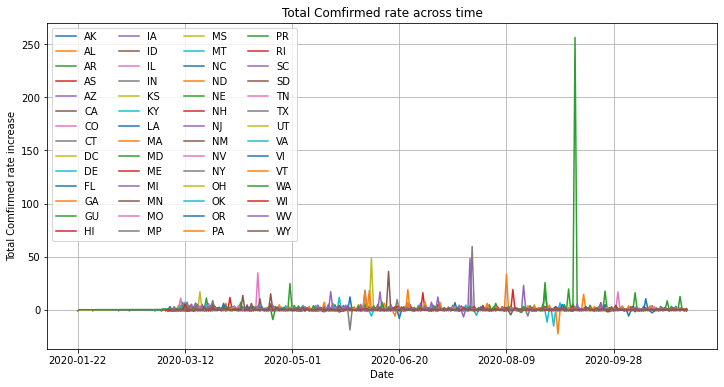

In [12]:
result = state.pivot(index='state', columns='date',values='comfirm rate')
result.T.plot(grid = True)
plt.xlabel("Date")
plt.ylabel("Total Comfirmed rate increase")
plt.title("Total Comfirmed rate across time")
plt.legend(loc=2,ncol=4)
plt.rcParams["figure.figsize"] = [20,10]

Based on the plot above, we can see that across time, There are some state total confirmed increasing rate is very high, there is one approximate 250% which means that most of the time the increasing rate of that state is positive. However, the rest of the data are stable at around 0-50%. Which we can predict that for most states the confirmed rate had under control.

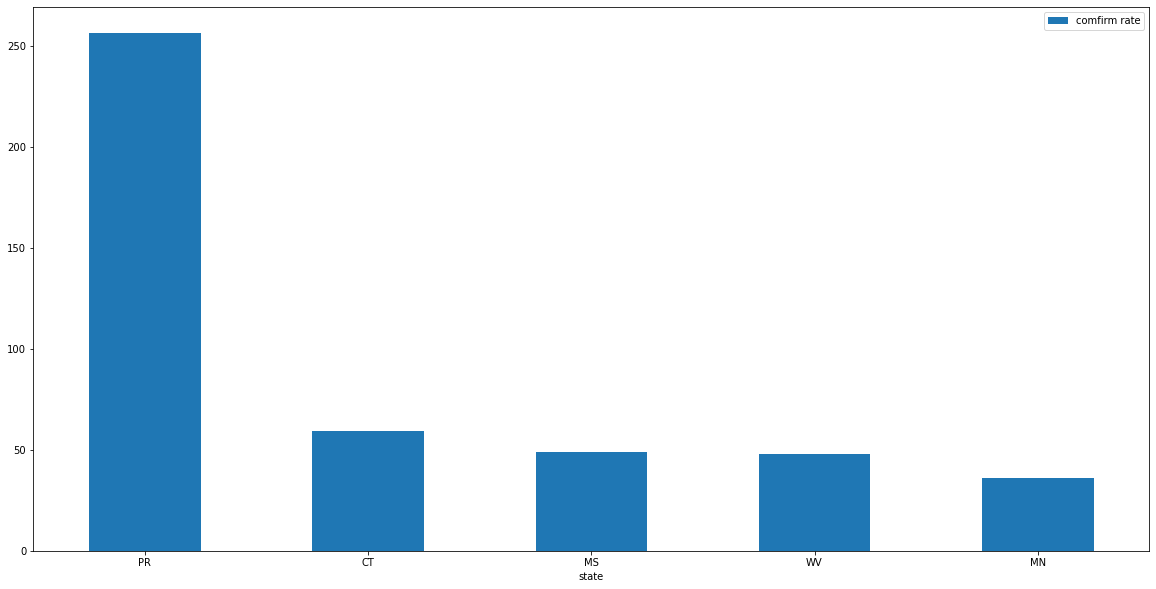

In [15]:
# Find the highest 5 confirmed rate
top5=state.nlargest(5, 'comfirm rate')
top5.plot.bar(x='state', y='comfirm rate', rot=0)

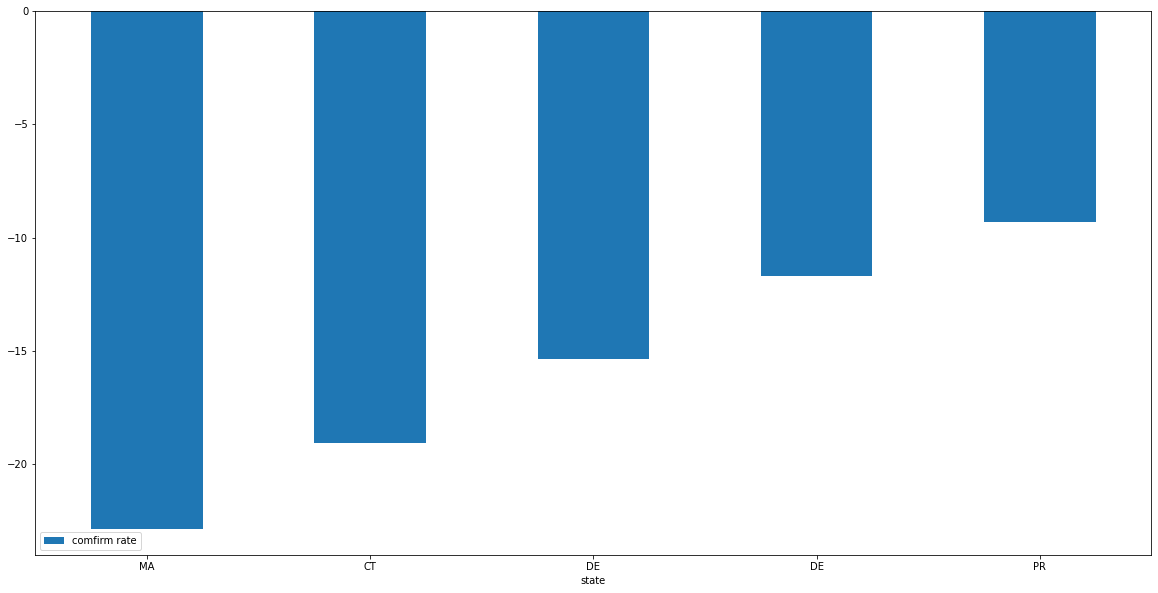

In [16]:
# Find the lowest 5 confirmed rate
low5=state.nsmallest(5, 'comfirm rate')
low5.plot.bar(x='state', y='comfirm rate', rot=0)

From the plot we can see that states like Puerto Rico have very high comfirmed rate overtime. And states like Massachusetts have the lowest comfirmed rate overtime.

Text(0, 0.5, 'Comfirm rate')

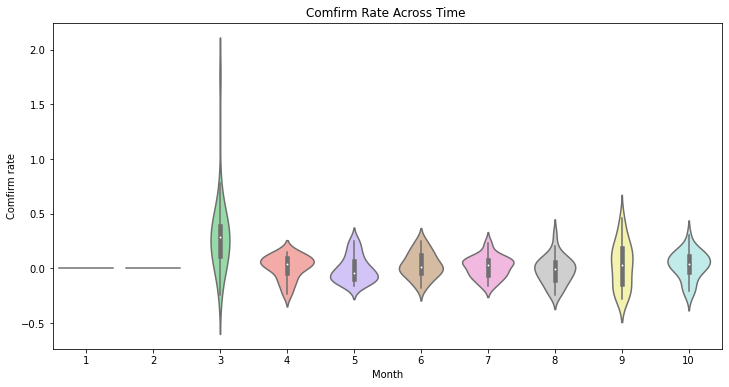

In [17]:
# Plot the data
plt.figure(figsize=(12, 6))
seab.violinplot(national['month'], national["comfirm rate"], data=national, palette="pastel")
plt.title("Comfirm Rate Across Time ") 
plt.xlabel("Month")
plt.ylabel("Comfirm rate") 

From the plot, we can see that the confirmed rate of the US had reached 2%. which is the time The World Health Organization (WHO) on March 11, 2020, has declared the novel coronavirus (COVID-19) outbreak a global pandemic. Then from the middle of March, the government had released the lockdown notice until late May. From the data, I use I can predict that the confirmed rates dropped very fast during the lockdown time.

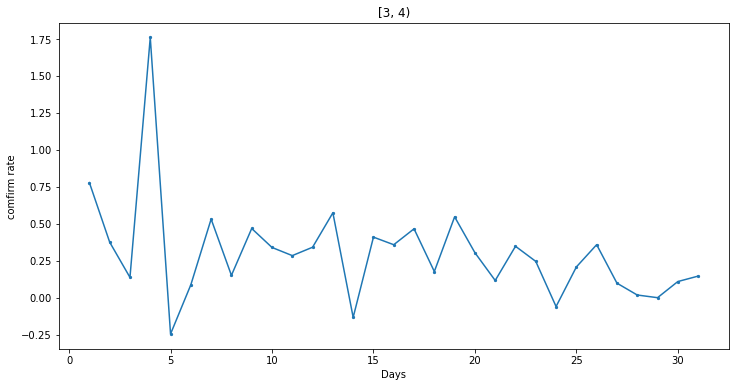

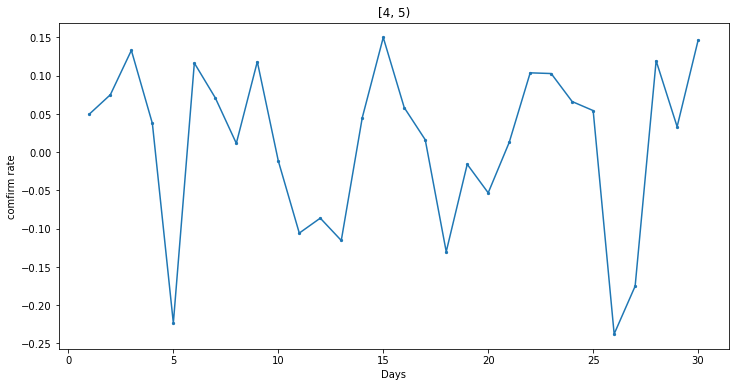

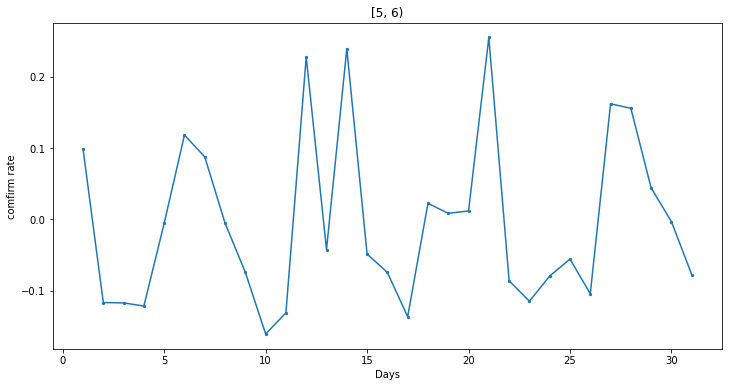

In [18]:
#Cut off the month during lockdown 
bins = [3, 4, 5, 6]
national['range'] = pd.cut(national['month'], bins, right=False)
for b, groups in national.groupby('range'):
    #Save data to np array to use
    X = np.array(groups['day']).reshape(-1, 1)
    y = np.array(groups['comfirm rate']).reshape(-1, 1) 
    groups.plot(kind='scatter',x='day',y='comfirm rate',\
    title=b, marker='.',figsize=(12, 6))
    plt.plot(X, y)
    plt.title(b) 
    plt.xlabel("Days")
    plt.ylabel("comfirm rate")

I took the 4 months from data, only keep the date from March to June. We can see that in the first month the confirmed rate had reached 1.75% per day, then the lockdown begins the confirmed rates continues to drop. In April, the confirmed rates had dropped below 0.15% per day, and in May the confirmed rate had stead around between 0.3 to -0.1. I can say that the lockdown decision made by the government is very successful.



# Now, In this part of the tutorial, I am interested to see how does COVID-19 impacts the US stock market. 

For those who have experience in the stock market, we all aware that the stock market has experienced significant change during the COVID period. The COVID has caused fatal harm to the overall economy. One of the ways to analyze the relationship between the US economy and COVID is by looking at the stock market. I am interested to know if the COVID is actually one of the major factors that impact the whole stock market. In another word, was COVID bring a negative impact on the stock market. Therefore, I want to find the answer by looking at the data. However, it is difficult to include the stock of ALL the companies in the US. As the result, I would like to analyze the two most representative stocks, "S&P 500"(The S&P 500 Index or the Standard & Poor's 500 Index is a market-capitalization-weighted index of 500 of the largest publicly-traded companies in the U.S.) and "Dow Jones" (Dow Jones & Company is one of the largest business and financial news companies in the world.) to help represent the trend of US stock.

link for more information about S&P 500: https://www.investopedia.com/terms/s/sp500.asp

link for more information about Dow Jones: https://www.investopedia.com/ask/answers/who-or-what-is-dow-jones/

In [19]:
# read csv file for S&P 500 stock
SP_df = pd.read_csv("SP500.csv")
# display to see how SP500 dataframe looks like
SP_df.head()

Date         Open         High          Low        Close  \
0  2019-11-04  3078.959961  3085.199951  3074.870117  3078.270020   
1  2019-11-05  3080.800049  3083.949951  3072.149902  3074.620117   
2  2019-11-06  3075.100098  3078.340088  3065.889893  3076.780029   
3  2019-11-07  3087.020020  3097.770020  3080.229980  3085.179932   
4  2019-11-08  3081.250000  3093.090088  3073.580078  3093.080078   

     Adj Close      Volume  
0  3078.270020  4146850000  
1  3074.620117  4486130000  
2  3076.780029  4458190000  
3  3085.179932  4144640000  
4  3093.080078  3499150000

In [20]:
# read csv file for Dow Jones stock
dow_df = pd.read_csv("Dow.csv")
# display to see how SP500 dataframe looks like
dow_df.head()

Date          Open          High           Low         Close  \
0  2019-11-04  27402.060547  27517.580078  27402.060547  27462.109375   
1  2019-11-05  27500.230469  27560.359375  27453.550781  27492.630859   
2  2019-11-06  27502.740234  27526.050781  27407.810547  27492.560547   
3  2019-11-07  27590.160156  27774.669922  27590.160156  27674.800781   
4  2019-11-08  27686.199219  27694.949219  27578.970703  27681.240234   

      Adj Close     Volume  
0  27462.109375  273030000  
1  27492.630859  286350000  
2  27492.560547  237910000  
3  27674.800781  259020000  
4  27681.240234  221440000

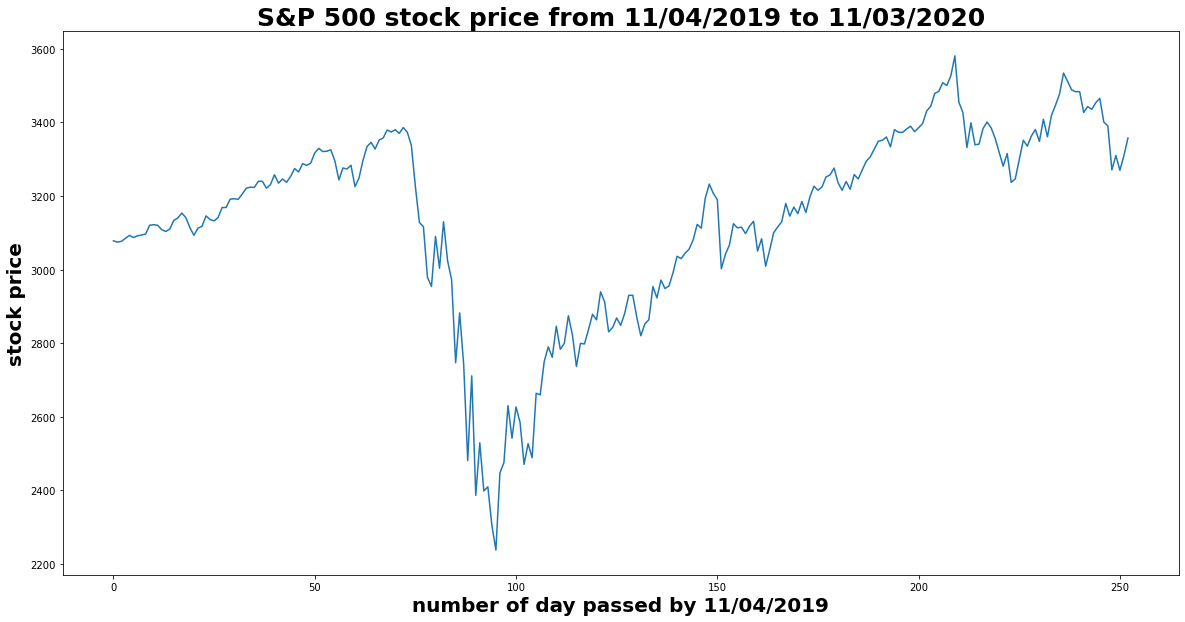

In [21]:
plt.plot(SP_df['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("S&P 500 stock price from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

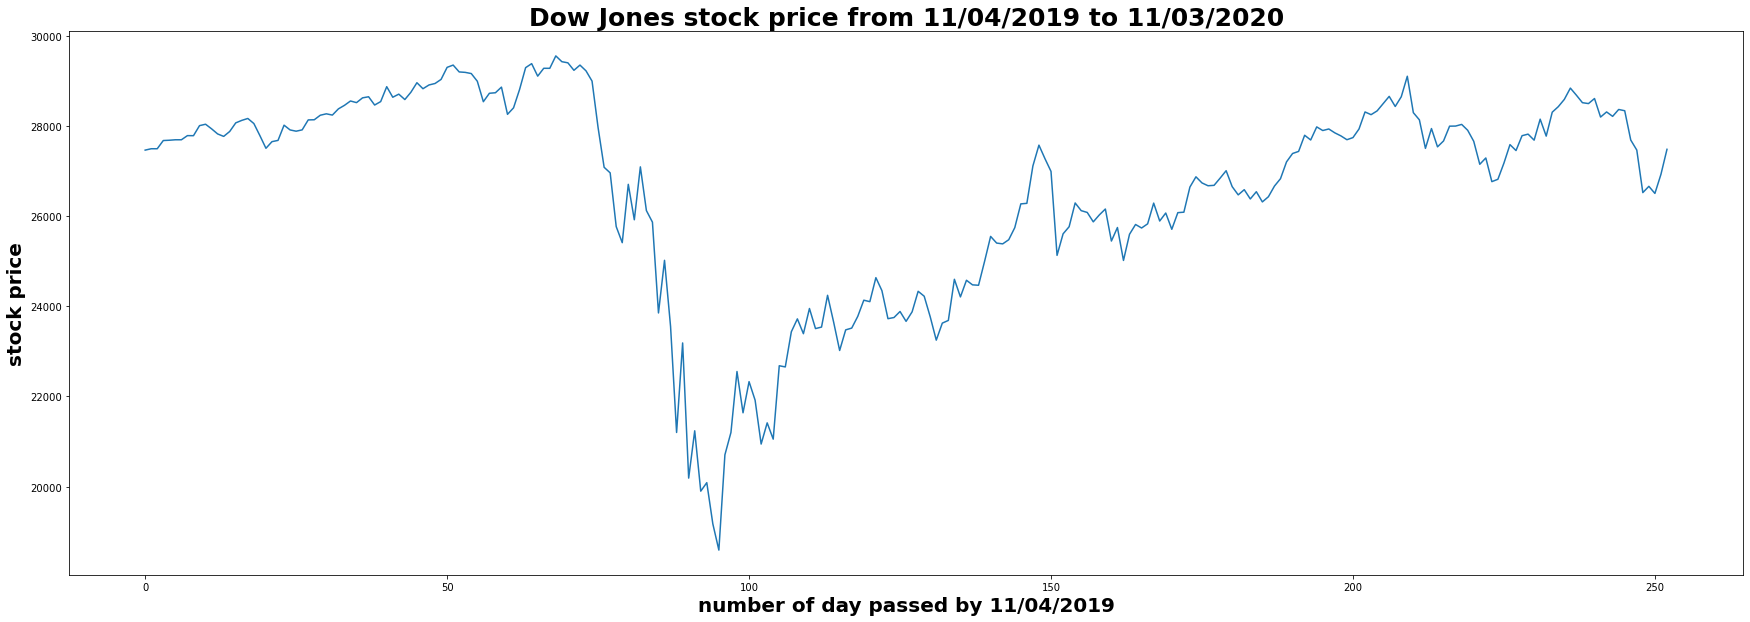

In [22]:
plt.plot(dow_df['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Dow Jones stock price from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

It's difficult to see the change each day by directly looking at adj close price of stock. Let's see the stock price change in percentage to have a better visualization

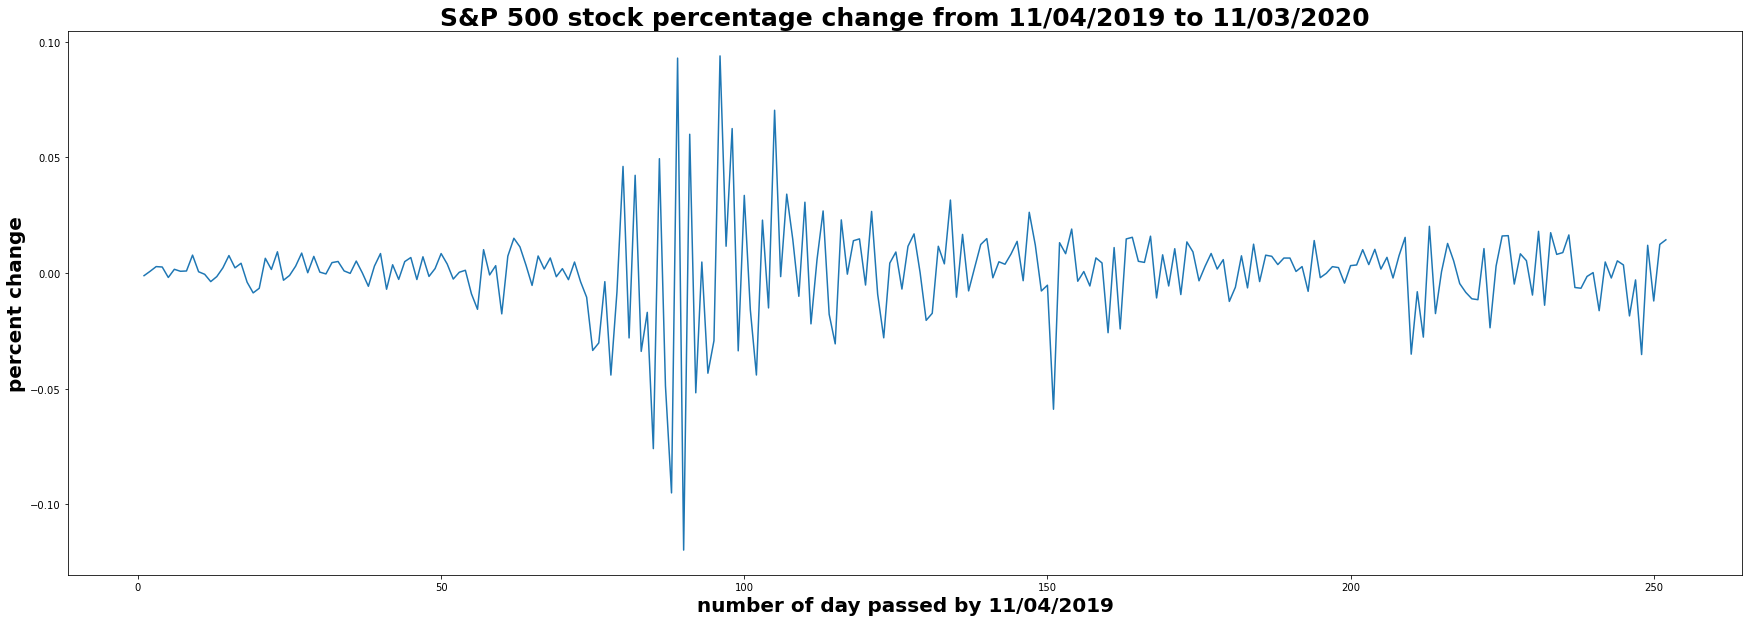

In [23]:
pct_SP500 = SP_df['Adj Close'].pct_change()
pct_dow = dow_df['Adj Close'].pct_change()

# now, Let's have a brief view of this percentage change graph
plt.plot(pct_SP500)

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("S&P 500 stock percentage change from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

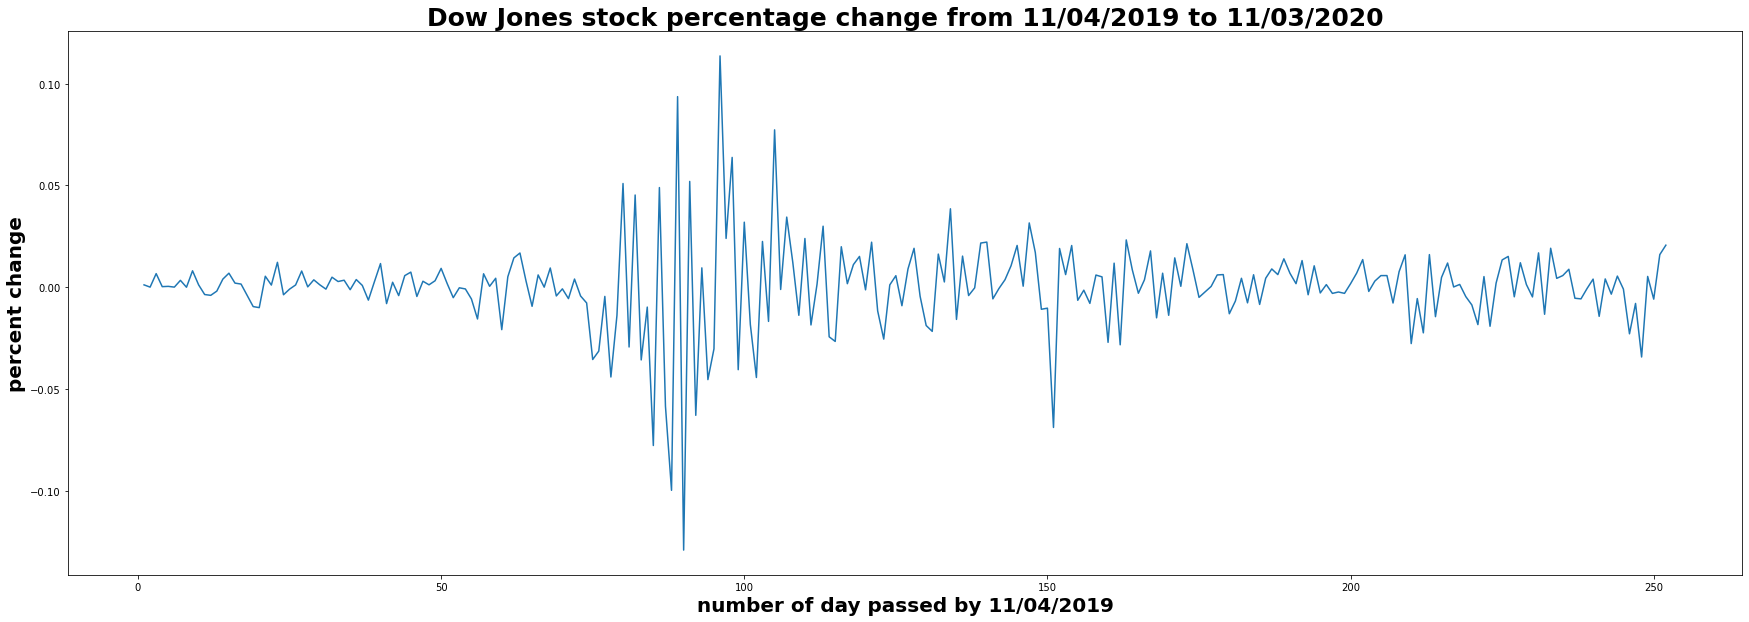

In [24]:
# now, Let's have a brief view of this percentage change graph
plt.plot(pct_dow)

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Dow Jones stock percentage change from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

By looking at the percentage change above, it's clear to see these 2 stocks are extremely volatile after 2/5 of the graph, which is exactly when the covid started. This indicates that COVID had a great impact on the stock market, but we want to analyze further whether it has a positive or negative impact on the stock market. 

So now, we want to compare the stock market before the covid and after the covid period. In order to do so, I will first find the date that the US has the first COVID case confirmed, which is 2/26/2020. And then split the data into half and compare to see how stock price change due to COVID

In [25]:
# we get that 2020-02-26 is at index 77 of dataframe
SP_df.loc[SP_df['Date'] == '2020-02-26']

Date         Open        High         Low        Close    Adj Close  \
77  2020-02-26  3139.899902  3182.51001  3108.98999  3116.389893  3116.389893   

        Volume  
77  5478110000

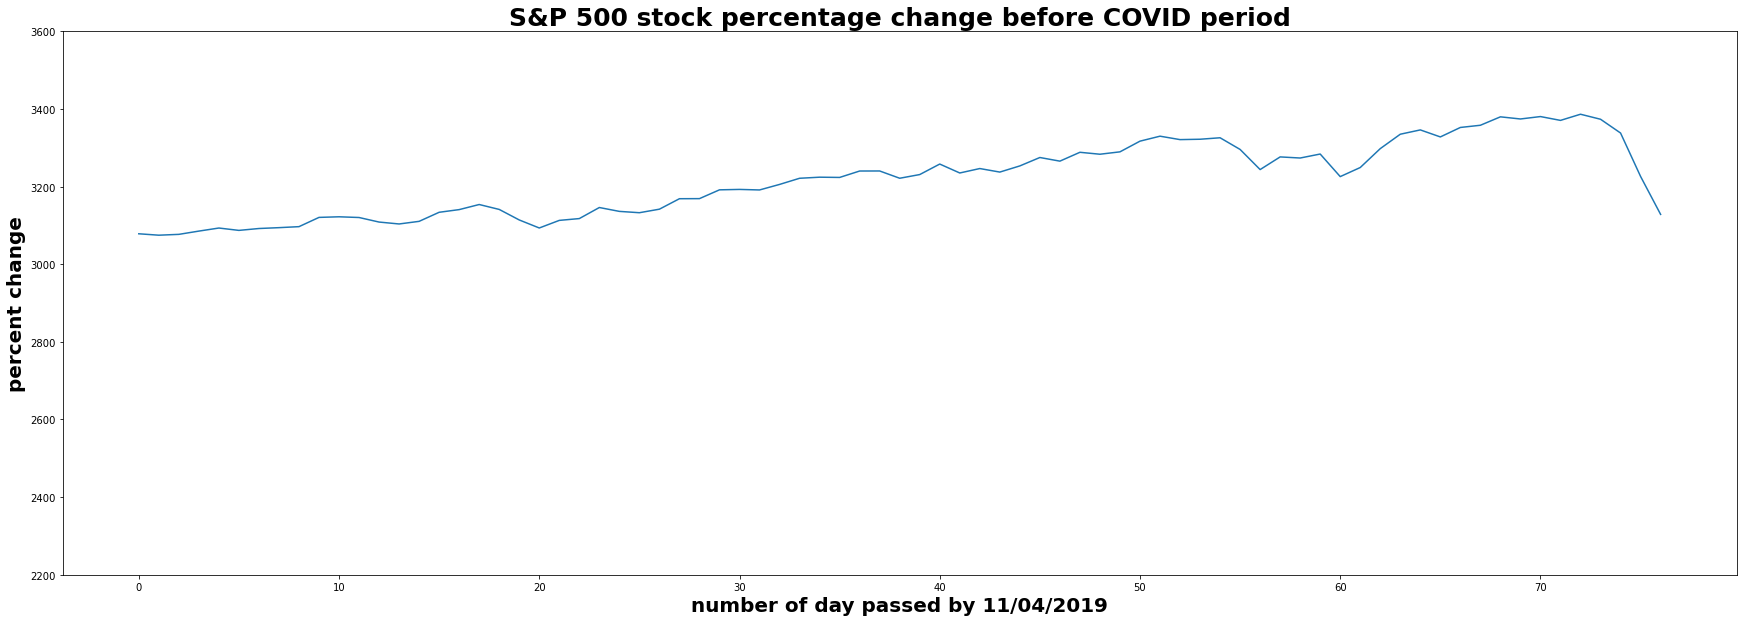

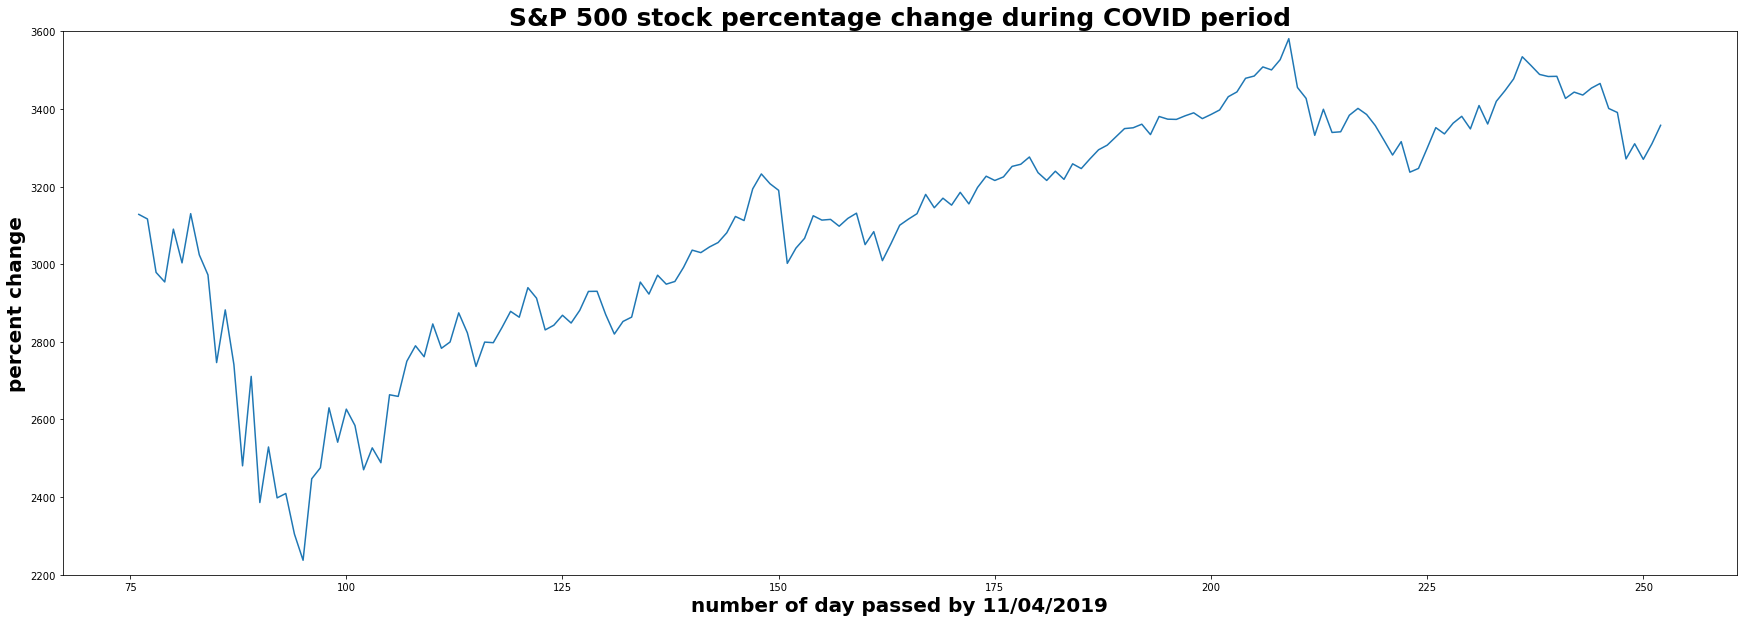

In [26]:
before_covid = SP_df.head(77)
during_covid = SP_df.tail(177)
plt.plot(before_covid['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((2200,3600))
plt.title("S&P 500 stock percentage change before COVID period", size=25, weight='bold')
plt.show()

plt.plot(during_covid['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((2200,3600))
plt.title("S&P 500 stock percentage change during COVID period", size=25, weight='bold')
plt.show()

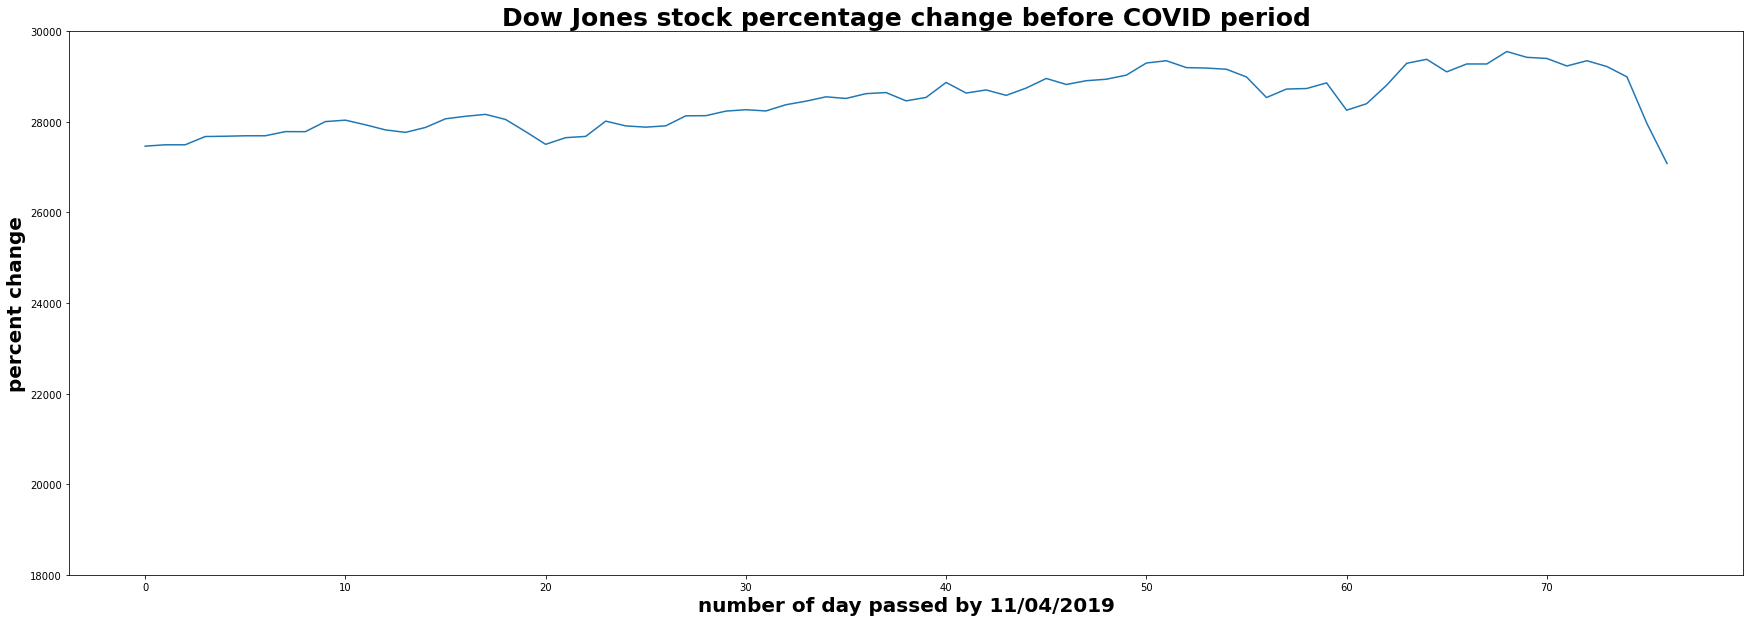

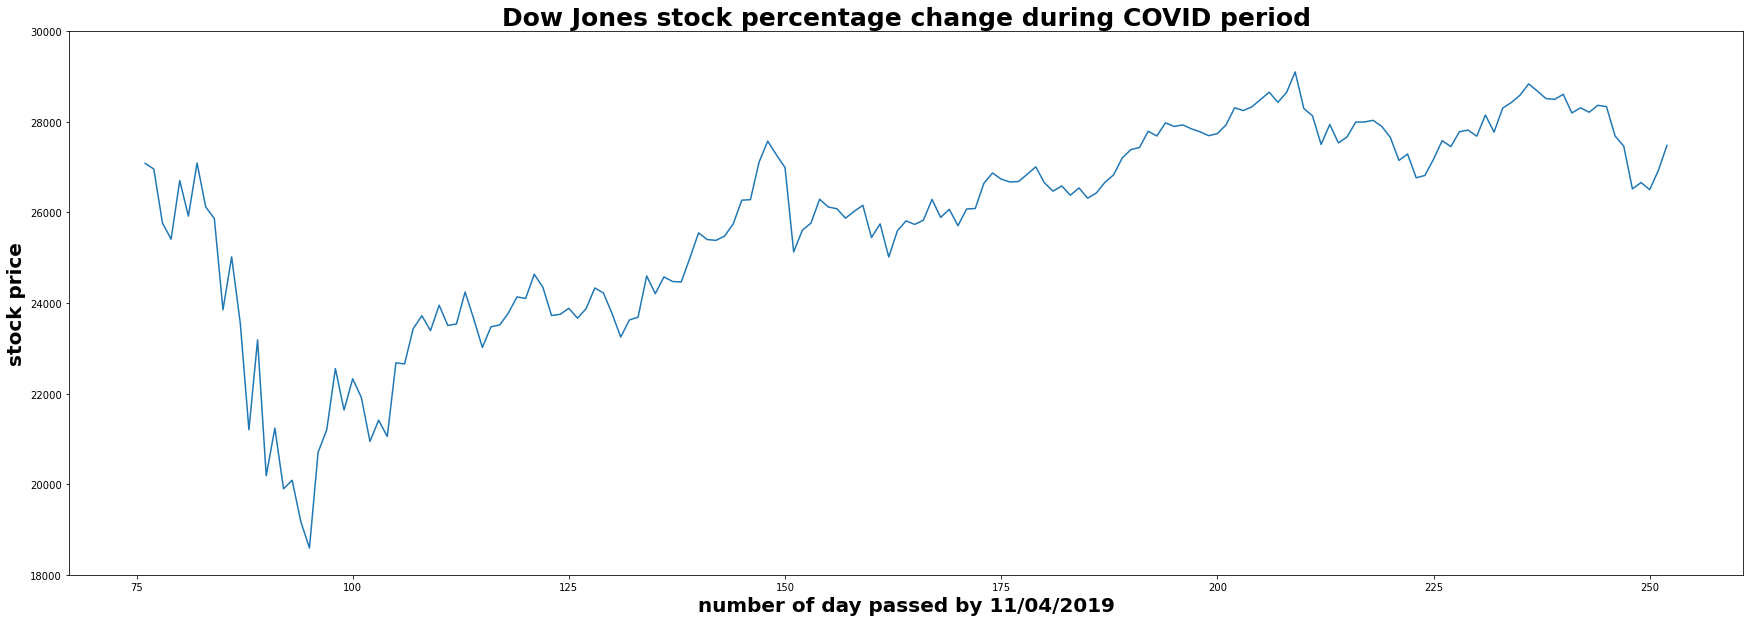

In [27]:
before_covid_dow = dow_df.head(77)
during_covid_dow = dow_df.tail(177)

plt.plot(before_covid_dow['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((18000,30000))
plt.title("Dow Jones stock percentage change before COVID period", size=25, weight='bold')
plt.show()

plt.plot(during_covid_dow['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((18000,30000))
plt.title("Dow Jones stock percentage change during COVID period", size=25, weight='bold')
plt.show()

First, let's look at before COVID period for both stocks. The general trend for both stocks was increasing slowly. However, at the beginning of the COVID period, both stocks had experienced significant decreases! This means that the first detection of the COVID case had caused a huge panic in the stock market, which leads to dramatically decrease for both the S&P 500 and Dow Jones. Although both stock prices are slowing going back to their peak, it's still obvious to show that COVID had brought a huge negative impact on the stock market, especially during late March and early April. And COVID is one of the factors that affects the stock market.